In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "openai"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  3000 non-null   object
 1   label                 3000 non-null   object
 2   title                 3000 non-null   object
 3   puzzle                3000 non-null   object
 4   truth                 3000 non-null   object
 5   gpt-4o-mini/shots-00  3000 non-null   object
 6   gpt-4o-mini/shots-05  3000 non-null   object
 7   gpt-4o-mini/shots-10  3000 non-null   object
 8   gpt-4o-mini/shots-20  3000 non-null   object
 9   gpt-4o-mini/shots-30  3000 non-null   object
 10  gpt-4o-mini/shots-40  3000 non-null   object
 11  gpt-4o-mini/shots-50  3000 non-null   object
 12  gpt-4o/shots-00       3000 non-null   object
 13  gpt-4o/shots-05       3000 non-null   object
 14  gpt-4o/shots-10       3000 non-null   object
 15  gpt-4o/shots-20       3000 non-null   

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'gpt-4o-mini/shots-00',
 'gpt-4o-mini/shots-05',
 'gpt-4o-mini/shots-10',
 'gpt-4o-mini/shots-20',
 'gpt-4o-mini/shots-30',
 'gpt-4o-mini/shots-40',
 'gpt-4o-mini/shots-50',
 'gpt-4o/shots-00',
 'gpt-4o/shots-05',
 'gpt-4o/shots-10',
 'gpt-4o/shots-20',
 'gpt-4o/shots-30',
 'gpt-4o/shots-40',
 'gpt-4o/shots-50']

In [9]:
result_columns = df.columns.to_list()[5:]
result_columns.sort()
result_columns

['gpt-4o-mini/shots-00',
 'gpt-4o-mini/shots-05',
 'gpt-4o-mini/shots-10',
 'gpt-4o-mini/shots-20',
 'gpt-4o-mini/shots-30',
 'gpt-4o-mini/shots-40',
 'gpt-4o-mini/shots-50',
 'gpt-4o/shots-00',
 'gpt-4o/shots-05',
 'gpt-4o/shots-10',
 'gpt-4o/shots-20',
 'gpt-4o/shots-30',
 'gpt-4o/shots-40',
 'gpt-4o/shots-50']

In [10]:
# sort columns
df2 = df[
    [
        "text",
        "label",
        "title",
        "puzzle",
        "truth",
    ]
].copy()
df2[result_columns] = df[result_columns]

In [11]:
df = df2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  3000 non-null   object
 1   label                 3000 non-null   object
 2   title                 3000 non-null   object
 3   puzzle                3000 non-null   object
 4   truth                 3000 non-null   object
 5   gpt-4o-mini/shots-00  3000 non-null   object
 6   gpt-4o-mini/shots-05  3000 non-null   object
 7   gpt-4o-mini/shots-10  3000 non-null   object
 8   gpt-4o-mini/shots-20  3000 non-null   object
 9   gpt-4o-mini/shots-30  3000 non-null   object
 10  gpt-4o-mini/shots-40  3000 non-null   object
 11  gpt-4o-mini/shots-50  3000 non-null   object
 12  gpt-4o/shots-00       3000 non-null   object
 13  gpt-4o/shots-05       3000 non-null   object
 14  gpt-4o/shots-10       3000 non-null   object
 15  gpt-4o/shots-20       3000 non-null   

In [12]:
df["label"].value_counts()

label
不是      1535
是       1245
不重要      138
问法错误      47
回答正确      35
Name: count, dtype: int64

In [13]:
perf_df = get_metrics_df(df, variant="shots")
perf_df

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:438: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots        model  accuracy  precision    recall        f1  \
0      0  gpt-4o-mini  0.717667   0.785707  0.717667  0.729606   
1      5  gpt-4o-mini  0.717667   0.776729  0.717667  0.718107   
2     10  gpt-4o-mini  0.679333   0.772809  0.679333  0.691675   
3     20  gpt-4o-mini  0.662333   0.768671  0.662333  0.679802   
4     30  gpt-4o-mini  0.687333   0.768421  0.687333  0.691302   
5     40  gpt-4o-mini  0.692333   0.763987  0.692333  0.692493   
6     50  gpt-4o-mini  0.717000   0.769264  0.717000  0.710523   
7      0       gpt-4o  0.782000   0.820405  0.782000  0.795302   
8      5       gpt-4o  0.787333   0.823097  0.787333  0.800029   
9     10       gpt-4o  0.791667   0.822771  0.791667  0.803615   
10    20       gpt-4o  0.781667   0.820454  0.781667  0.796702   
11    30       gpt-4o  0.788667   0.826085  0.788667  0.803095   
12    40       gpt-4o  0.784000   0.823351  0.784000  0.799334   
13    50       gpt-4o  0.787000   0.823480  0.787000  0.801353   

    ratio_valid_classifications  
0                      0.991667  
1                      0.999667  
2                      0.998333  
3                      0.998000  
4                      0.999000  
5                      0.998667  
6                      0.999333  
7                      0.066000  
8                      0.998000  
9                      0.999667  
10                     0.999333  
11                     0.999000  
12                     0.997333  
13                     0.999333

In [14]:
perf_df.to_csv(metrics_csv, index=False)

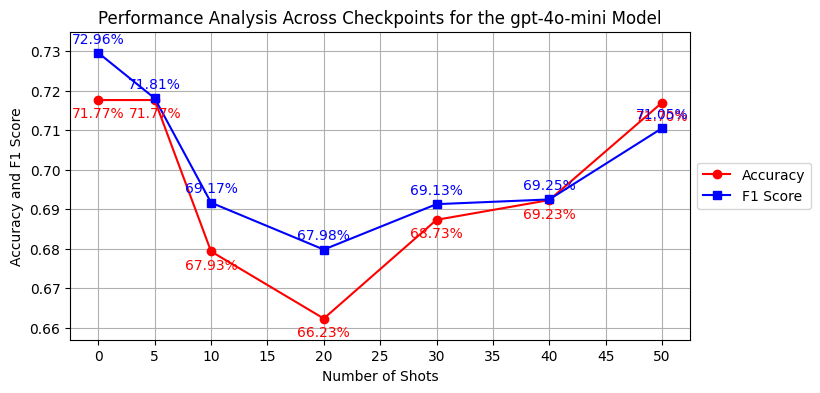

In [19]:
plot_metrics(perf_df, "gpt-4o-mini", variant="shots", offset=0.002)

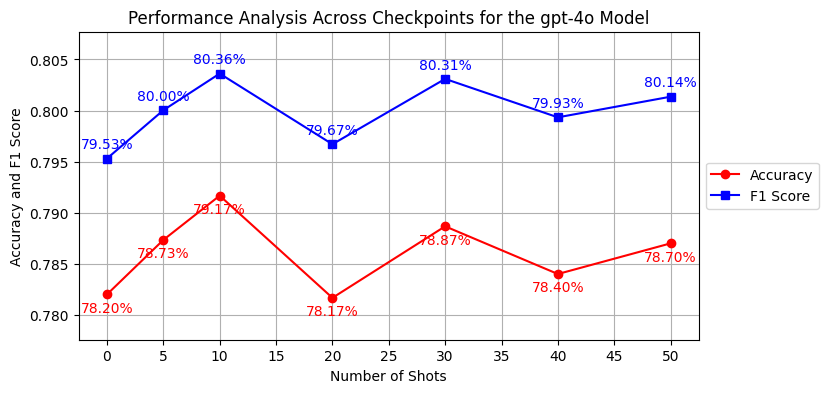

In [16]:
plot_metrics(perf_df, "gpt-4o", variant="shots", offset=0.003)

********** gpt-4o-mini/shots-00 **********
gpt-4o-mini/shots-00
不是       1812
是         788
问法错误      236
不重要       116
回答正确       23
不是。        15
问法错误。       5
回答正确。       3
是。          2
Name: count, dtype: int64


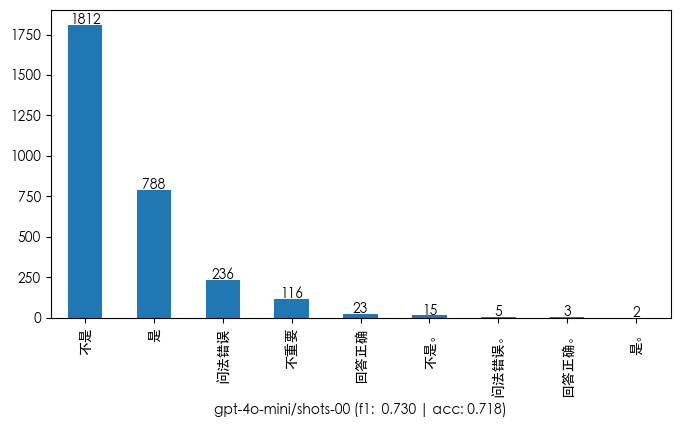

********** gpt-4o-mini/shots-05 **********
gpt-4o-mini/shots-05
不是      1941
是        724
问法错误     148
不重要      136
回答正确      50
回答错误       1
Name: count, dtype: int64


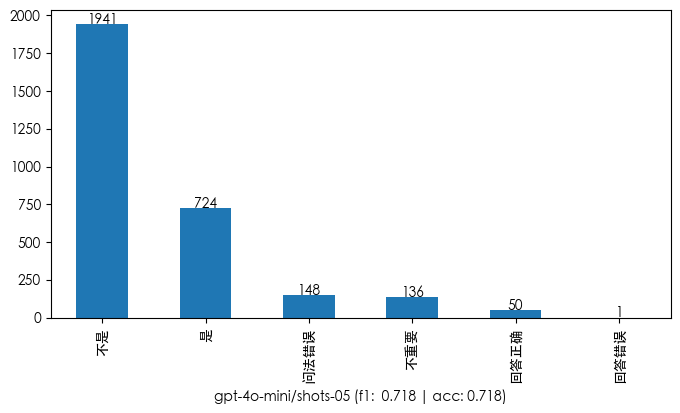

********** gpt-4o-mini/shots-10 **********
gpt-4o-mini/shots-10
不是          1833
是            667
问法错误         230
不重要          205
回答正确          60
回答: 问法错误       2
回答错误           1
回答: 回答正确       1
回答: 不是         1
Name: count, dtype: int64


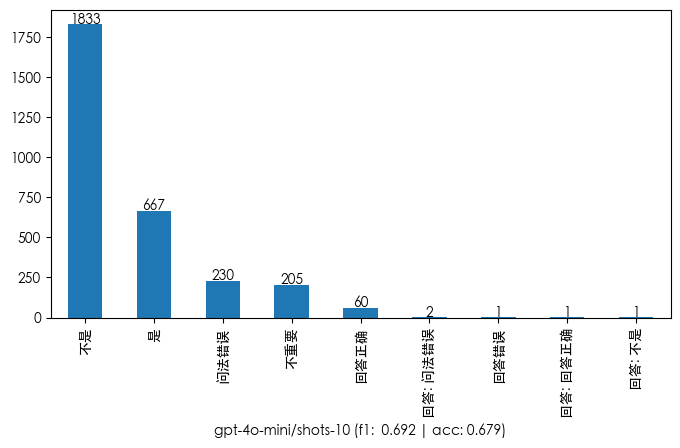

********** gpt-4o-mini/shots-20 **********
gpt-4o-mini/shots-20
不是          1807
是            654
问法错误         296
不重要          171
回答正确          66
回答错误           3
回答: 是          1
回答: 问法错误       1
回答: 回答正确       1
Name: count, dtype: int64


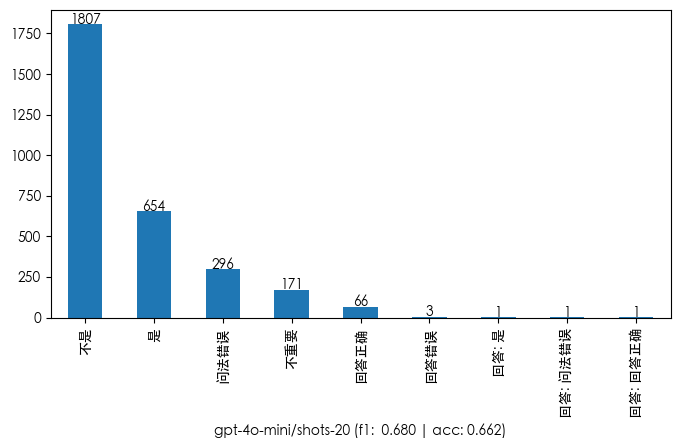

********** gpt-4o-mini/shots-30 **********
gpt-4o-mini/shots-30
不是       1945
是         665
问法错误      225
不重要       100
回答正确       62
回答错误        2
回答: 是       1
Name: count, dtype: int64


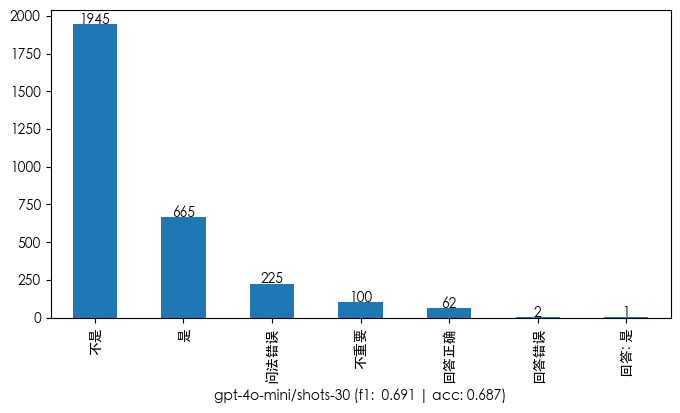

********** gpt-4o-mini/shots-40 **********
gpt-4o-mini/shots-40
不是          1971
是            681
问法错误         200
不重要           80
回答正确          64
回答错误           2
回答: 是          1
回答: 问法错误       1
Name: count, dtype: int64


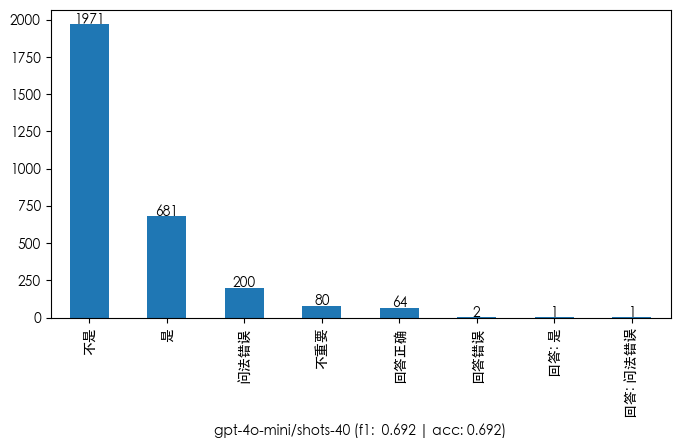

********** gpt-4o-mini/shots-50 **********
gpt-4o-mini/shots-50
不是          2015
是            715
问法错误         137
不重要           74
回答正确          57
回答: 问法错误       1
回答错误           1
Name: count, dtype: int64


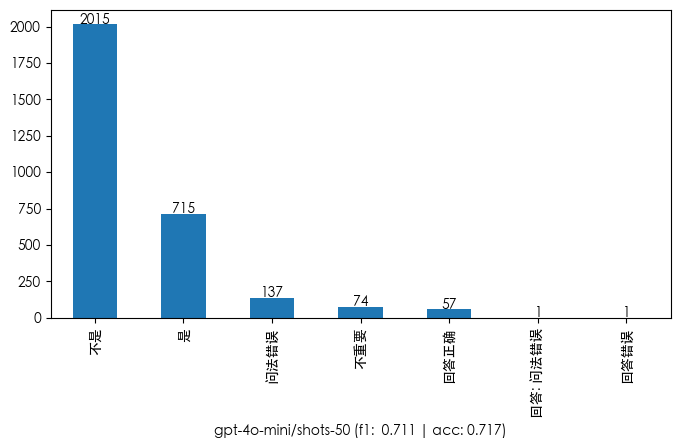

********** gpt-4o/shots-00 **********
gpt-4o/shots-00
不是。           1564
是。            1015
不重要。           142
不重要             82
问法错误            82
回答正确。           41
问法错误。           38
回答正确            14
不是              13
是                7
物品。              1
小男孩的。回答正确。       1
Name: count, dtype: int64


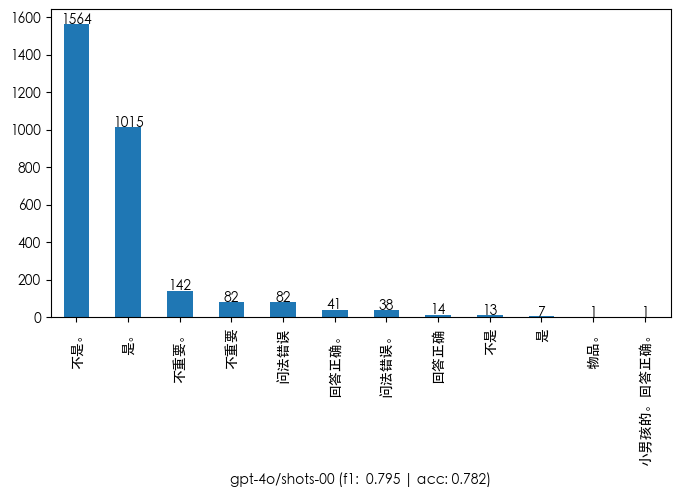

********** gpt-4o/shots-05 **********
gpt-4o/shots-05
不是      1565
是       1034
不重要      256
问法错误      85
回答正确      54
是。         6
Name: count, dtype: int64


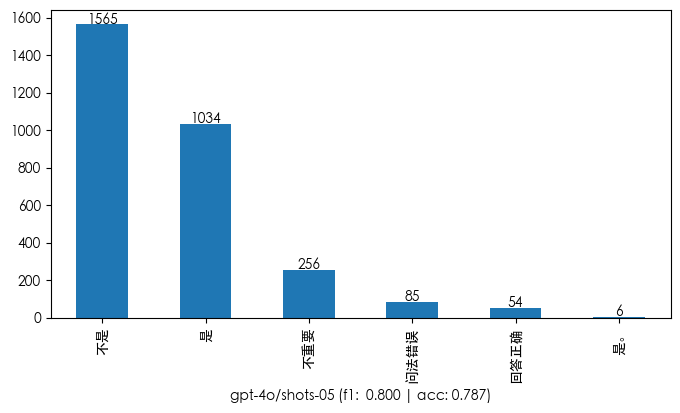

********** gpt-4o/shots-10 **********
gpt-4o/shots-10
不是      1543
是       1082
不重要      240
问法错误      89
回答正确      45
重要         1
Name: count, dtype: int64


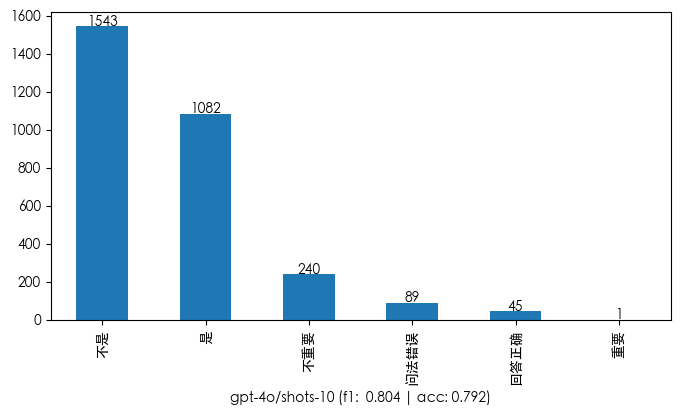

********** gpt-4o/shots-20 **********
gpt-4o/shots-20
不是                                                                                                                                                                                                                                                                                                                                           1507
是                                                                                                                                                                                                                                                                                                                                            1081
不重要                                                                                                                                                                                                                                                                           

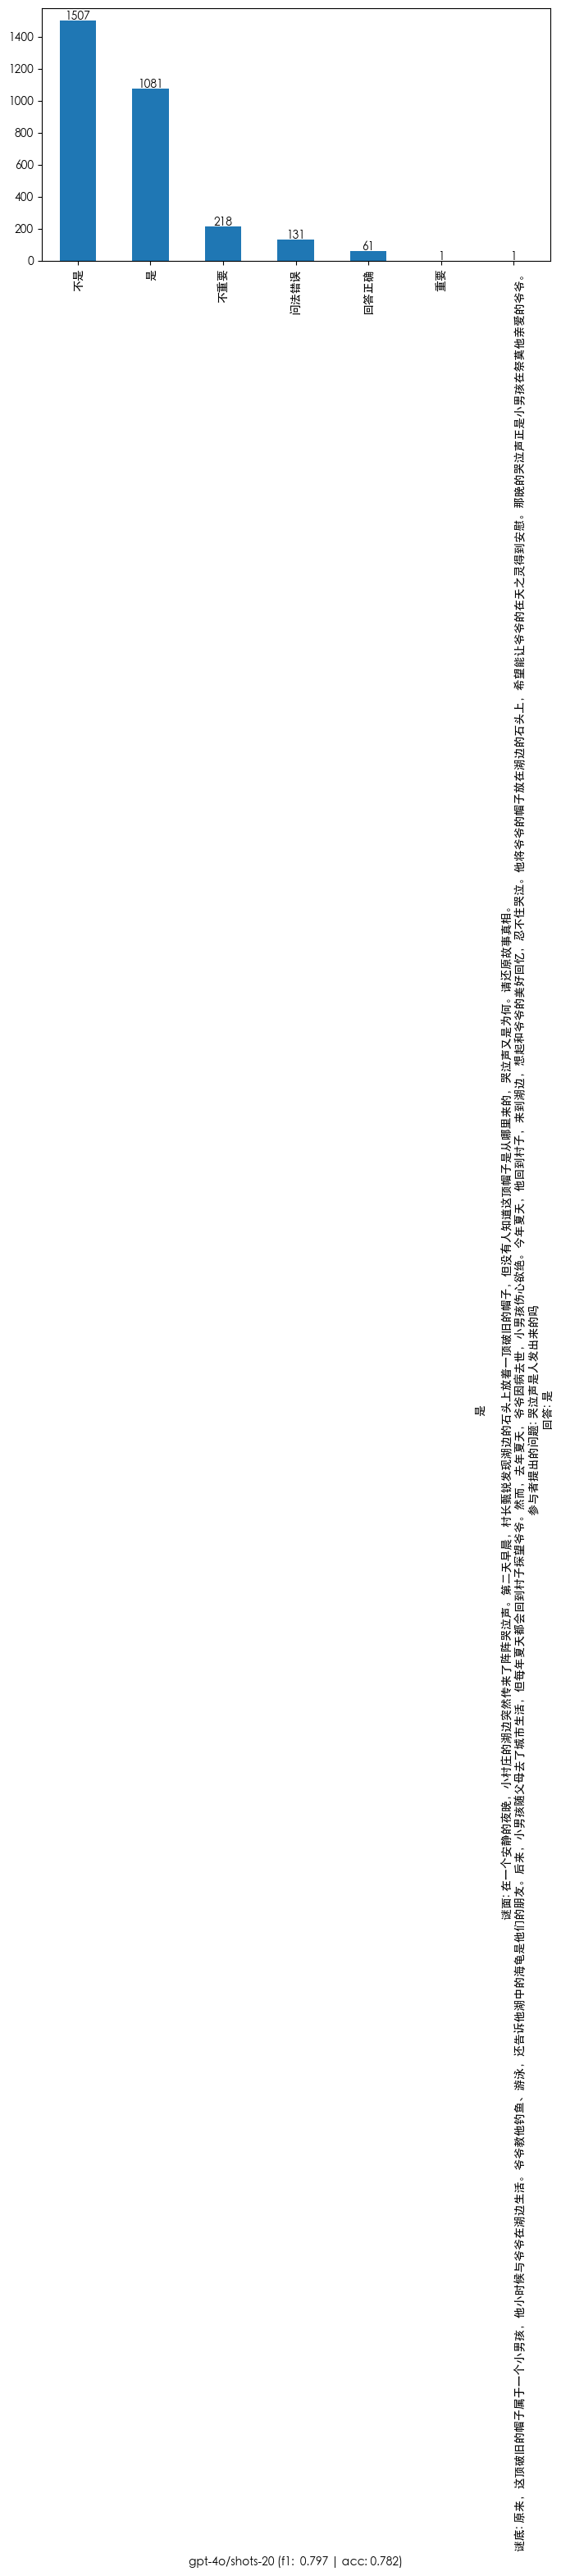

********** gpt-4o/shots-30 **********
gpt-4o/shots-30
不是        1526
是         1073
不重要        204
问法错误       142
回答正确        52
不是\n\n       2
重要           1
Name: count, dtype: int64


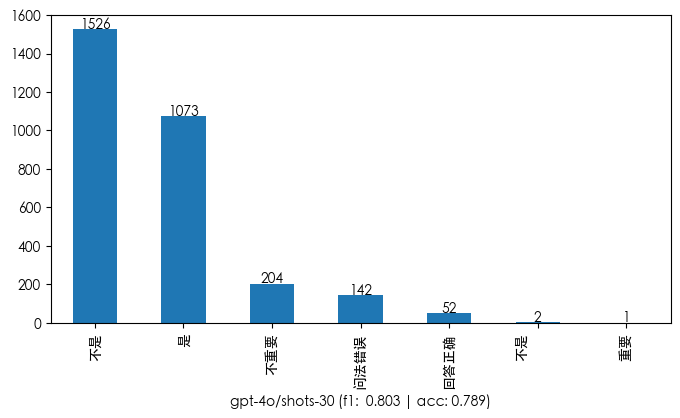

********** gpt-4o/shots-40 **********
gpt-4o/shots-40
不是                                                                                                                                                                                                                                                                                                                                                         1513
是                                                                                                                                                                                                                                                                                                                                                          1072
不重要                                                                                                                                                                                                                                               

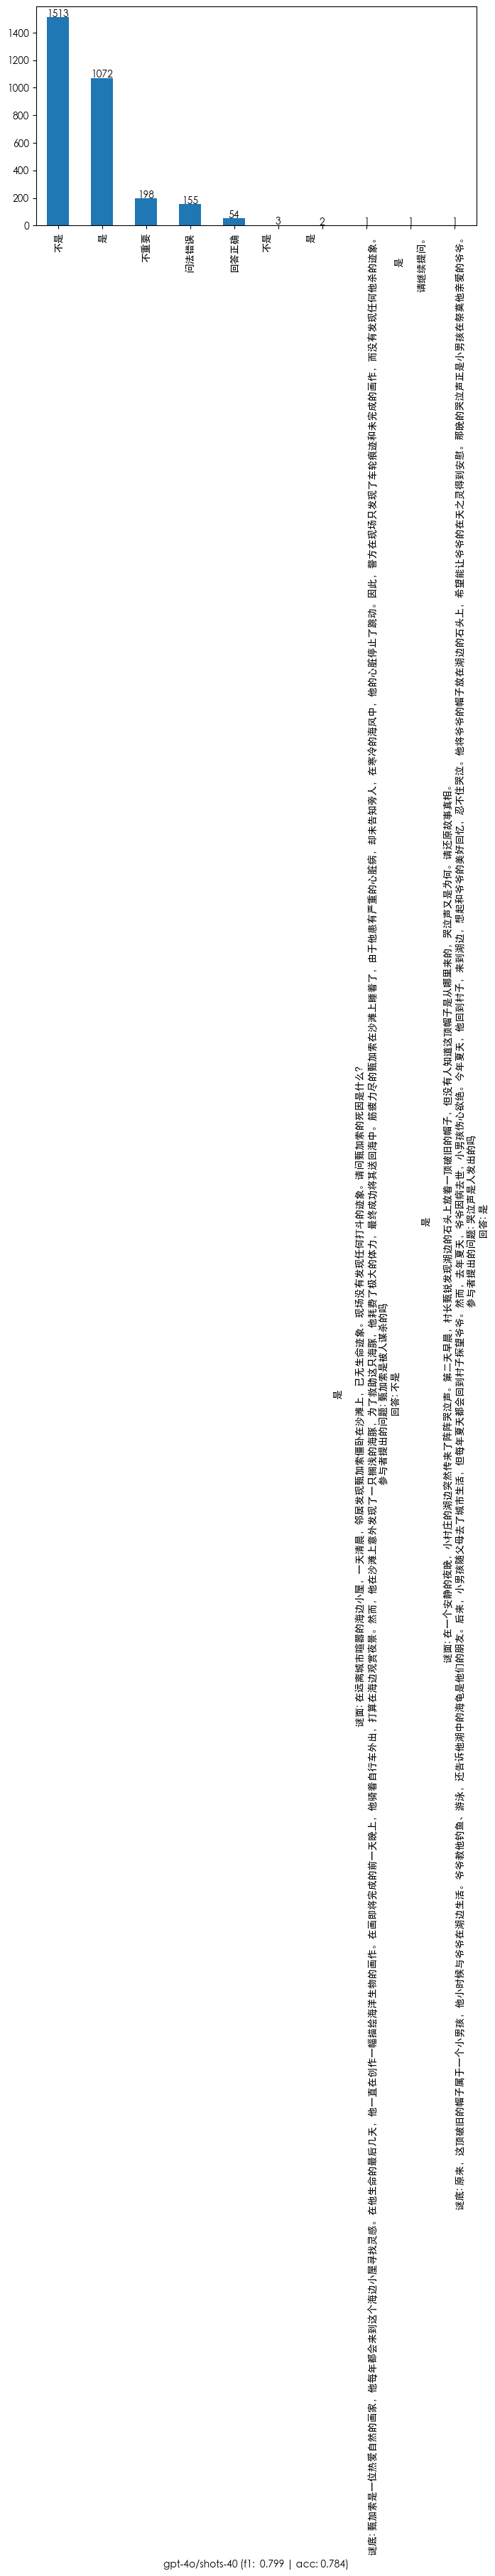

********** gpt-4o/shots-50 **********
gpt-4o/shots-50
不是       1523
是        1081
不重要       217
问法错误      126
回答正确       51
是\n\n       1
重要          1
Name: count, dtype: int64


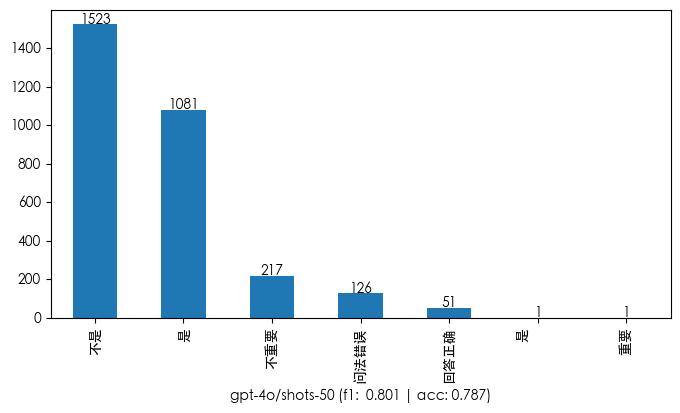

In [17]:
for col, f1, accuracy in zip(df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})")

********** gpt-4o-mini/shots-00 **********
gpt-4o-mini/shots-00
不是       1812
是         788
问法错误      236
不重要       116
回答正确       23
不是。        15
问法错误。       5
回答正确。       3
是。          2
Name: count, dtype: int64


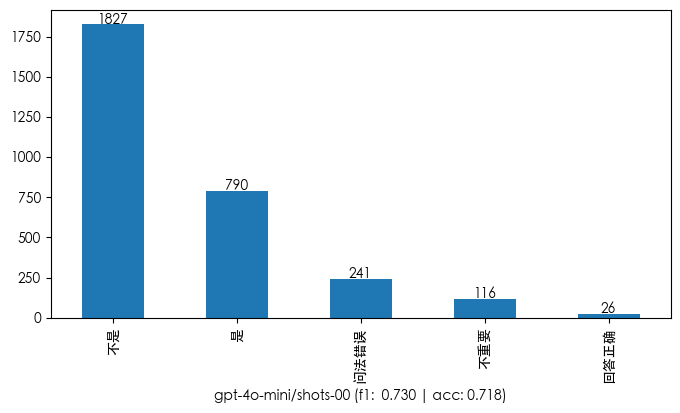

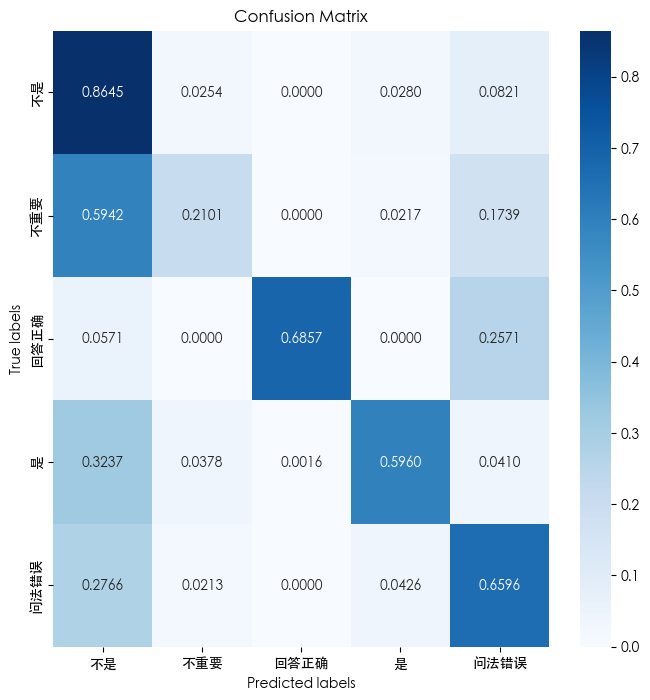

********** gpt-4o-mini/shots-05 **********
gpt-4o-mini/shots-05
不是      1941
是        724
问法错误     148
不重要      136
回答正确      50
回答错误       1
Name: count, dtype: int64


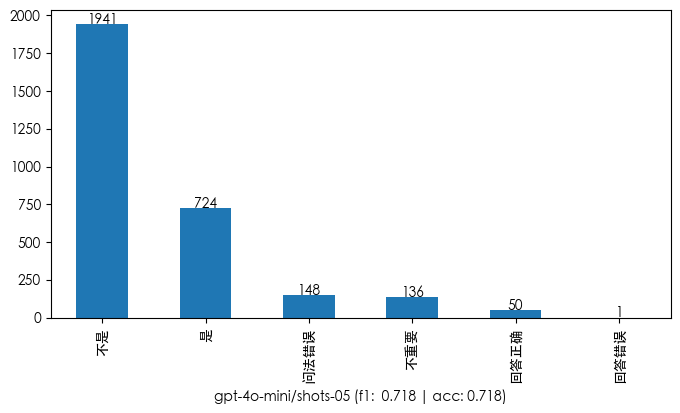

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


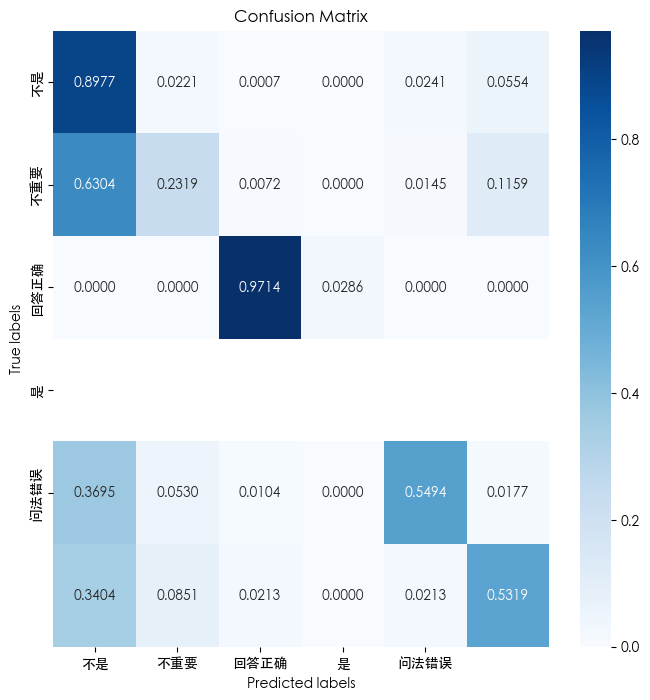

********** gpt-4o-mini/shots-10 **********
gpt-4o-mini/shots-10
不是          1833
是            667
问法错误         230
不重要          205
回答正确          60
回答: 问法错误       2
回答错误           1
回答: 回答正确       1
回答: 不是         1
Name: count, dtype: int64


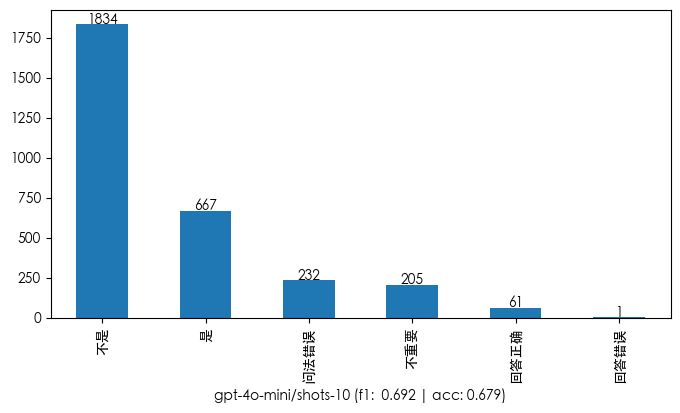

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


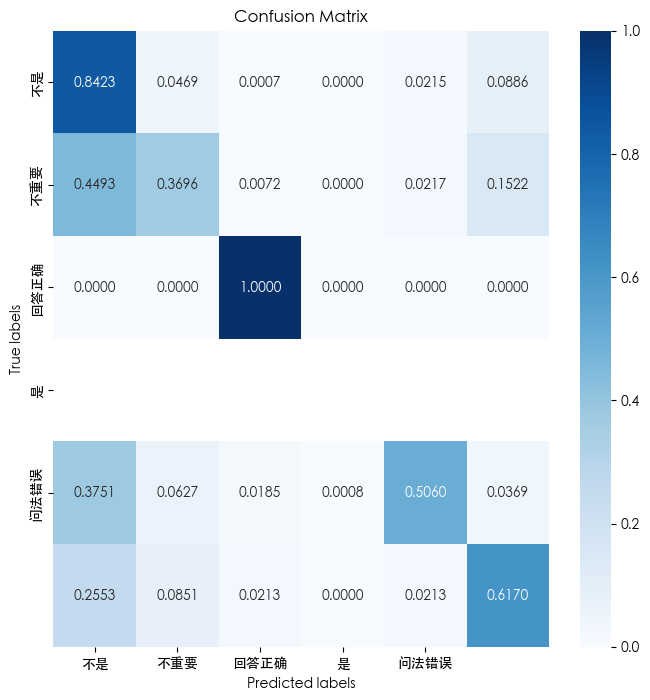

********** gpt-4o-mini/shots-20 **********
gpt-4o-mini/shots-20
不是          1807
是            654
问法错误         296
不重要          171
回答正确          66
回答错误           3
回答: 是          1
回答: 问法错误       1
回答: 回答正确       1
Name: count, dtype: int64


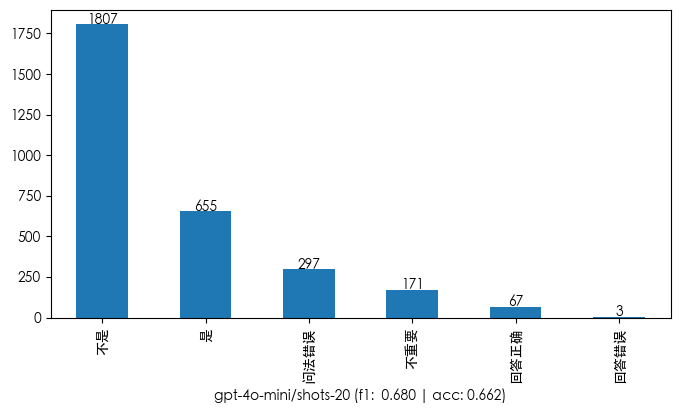

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


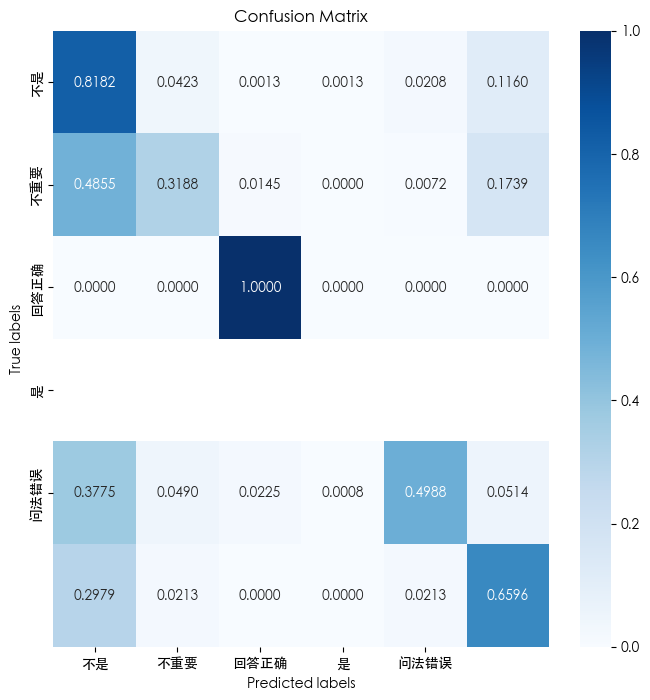

********** gpt-4o-mini/shots-30 **********
gpt-4o-mini/shots-30
不是       1945
是         665
问法错误      225
不重要       100
回答正确       62
回答错误        2
回答: 是       1
Name: count, dtype: int64


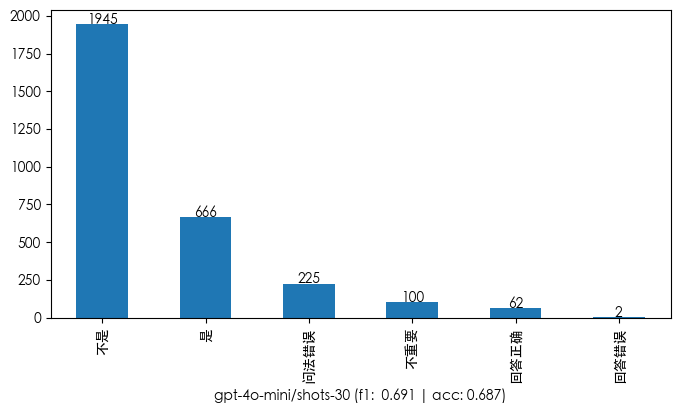

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


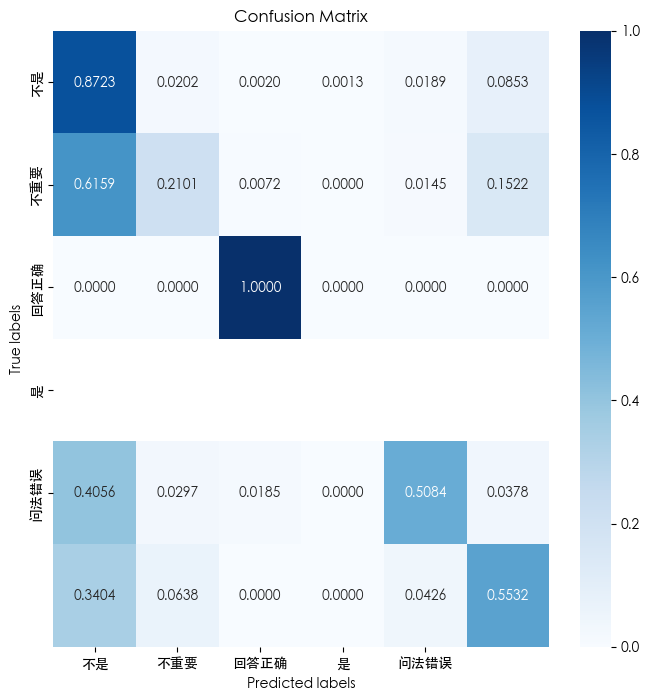

********** gpt-4o-mini/shots-40 **********
gpt-4o-mini/shots-40
不是          1971
是            681
问法错误         200
不重要           80
回答正确          64
回答错误           2
回答: 是          1
回答: 问法错误       1
Name: count, dtype: int64


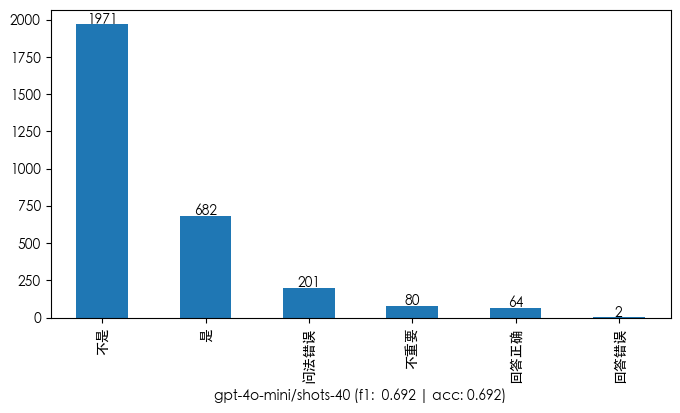

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


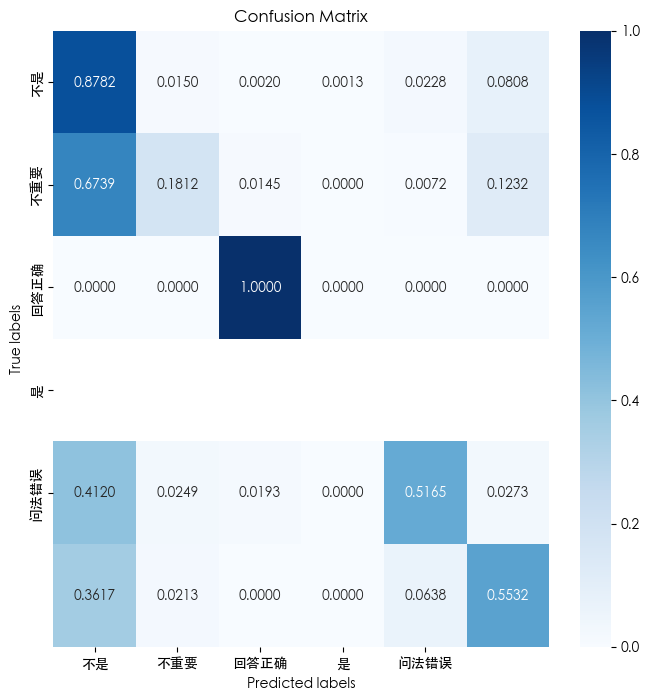

********** gpt-4o-mini/shots-50 **********
gpt-4o-mini/shots-50
不是          2015
是            715
问法错误         137
不重要           74
回答正确          57
回答: 问法错误       1
回答错误           1
Name: count, dtype: int64


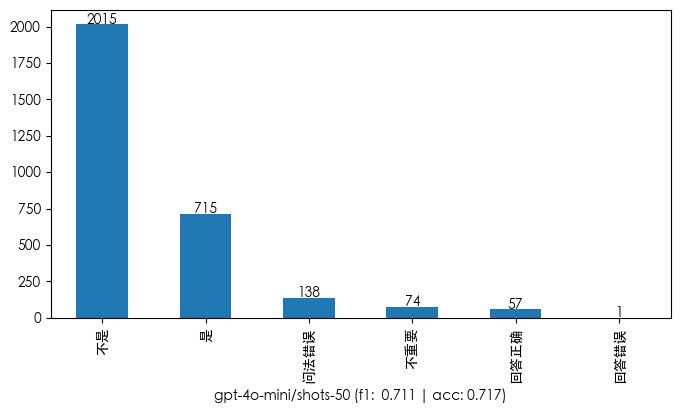

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


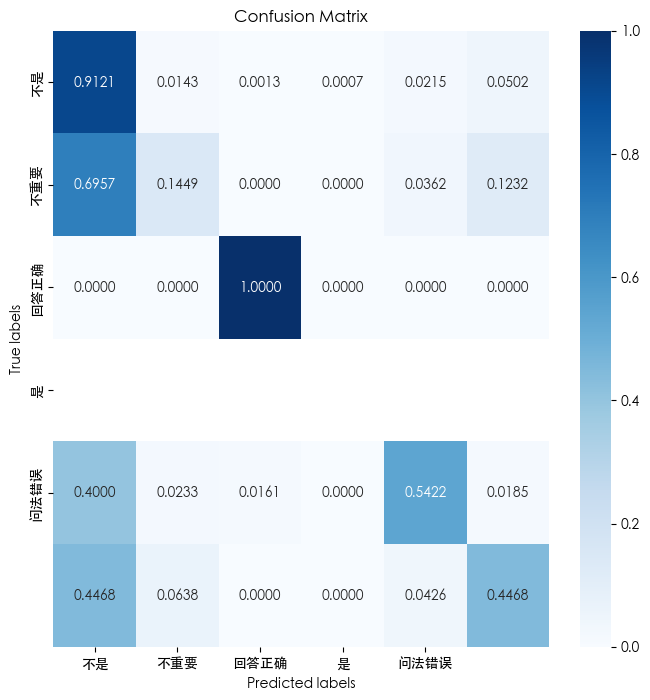

********** gpt-4o/shots-00 **********
gpt-4o/shots-00
不是。           1564
是。            1015
不重要。           142
不重要             82
问法错误            82
回答正确。           41
问法错误。           38
回答正确            14
不是              13
是                7
物品。              1
小男孩的。回答正确。       1
Name: count, dtype: int64


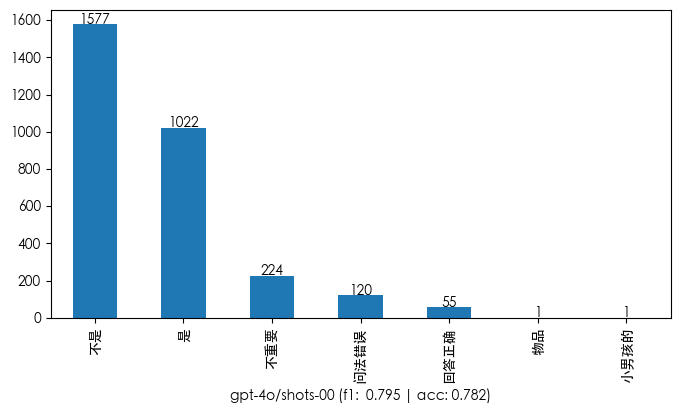

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


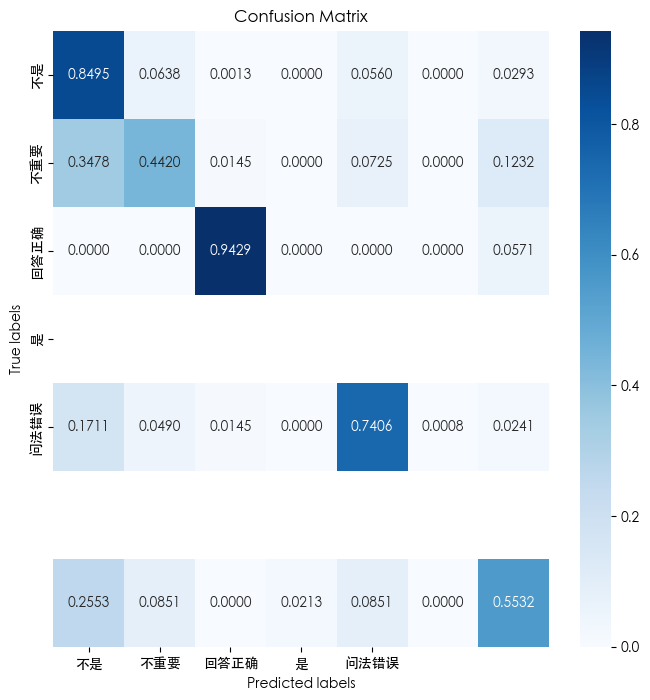

********** gpt-4o/shots-05 **********
gpt-4o/shots-05
不是      1565
是       1034
不重要      256
问法错误      85
回答正确      54
是。         6
Name: count, dtype: int64


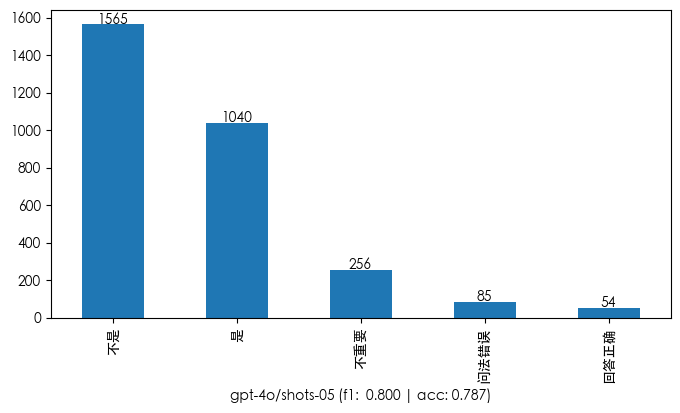

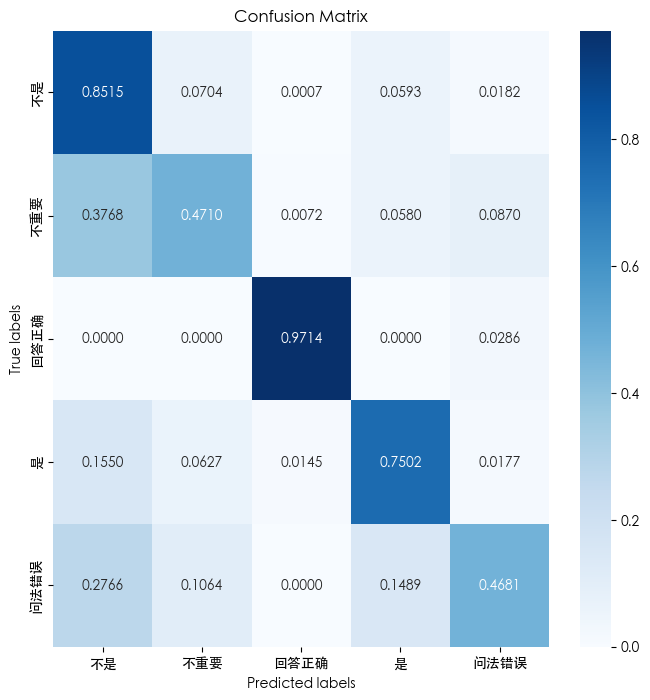

********** gpt-4o/shots-10 **********
gpt-4o/shots-10
不是      1543
是       1082
不重要      240
问法错误      89
回答正确      45
重要         1
Name: count, dtype: int64


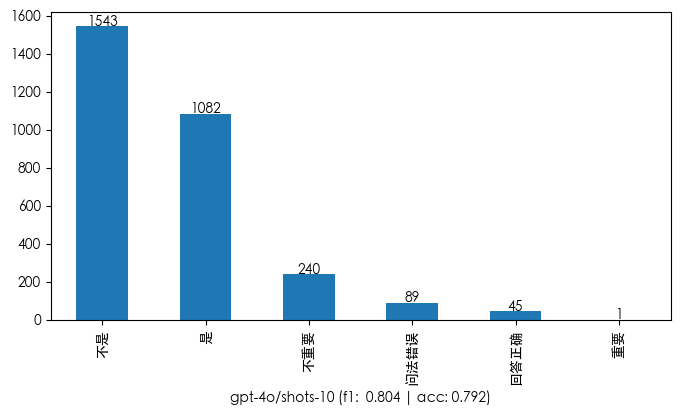

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


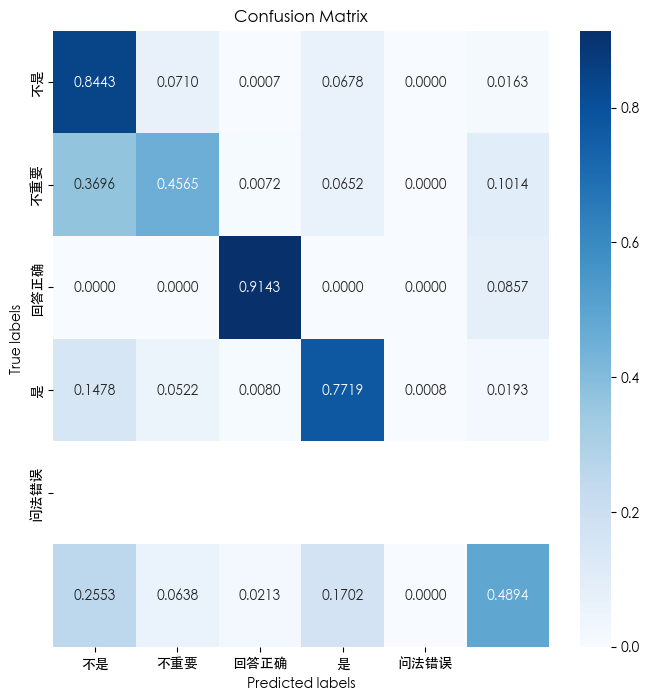

********** gpt-4o/shots-20 **********
gpt-4o/shots-20
不是                                                                                                                                                                                                                                                                                                                                           1507
是                                                                                                                                                                                                                                                                                                                                            1081
不重要                                                                                                                                                                                                                                                                           

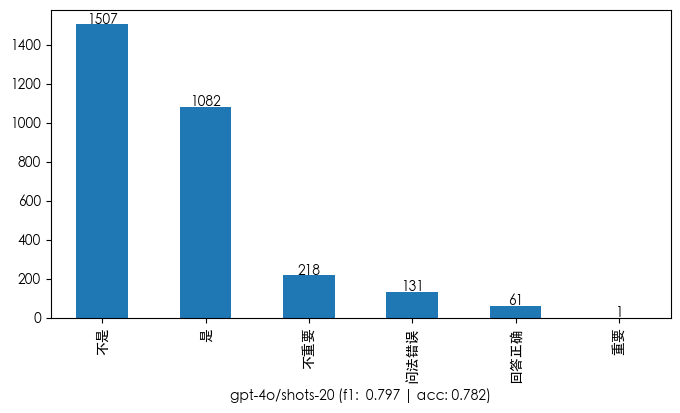

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


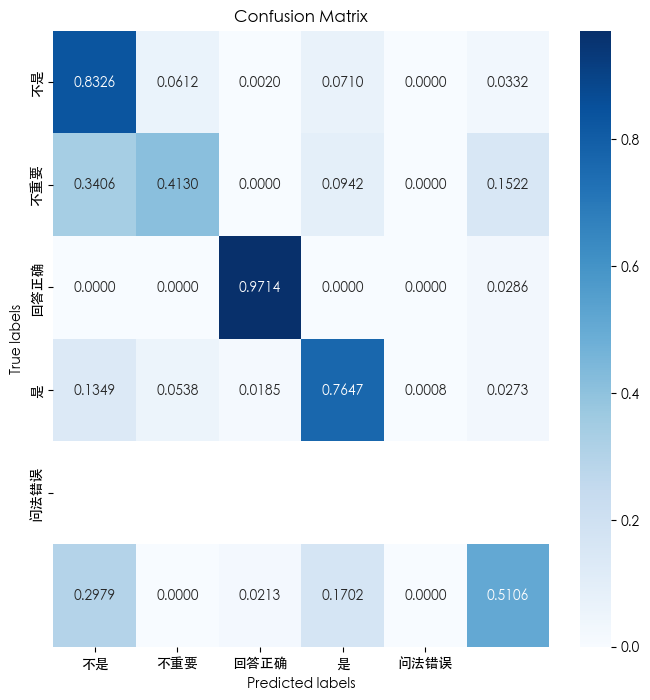

********** gpt-4o/shots-30 **********
gpt-4o/shots-30
不是        1526
是         1073
不重要        204
问法错误       142
回答正确        52
不是\n\n       2
重要           1
Name: count, dtype: int64


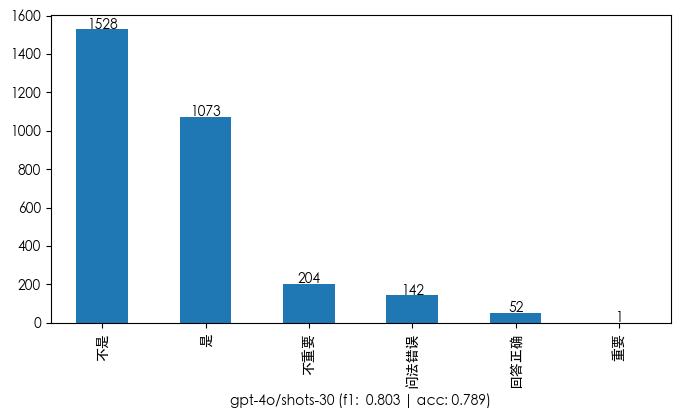

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


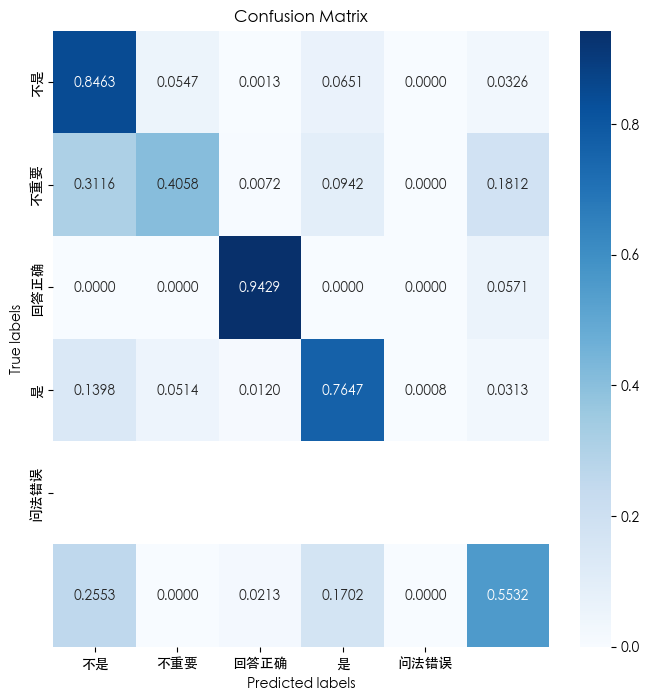

********** gpt-4o/shots-40 **********
gpt-4o/shots-40
不是                                                                                                                                                                                                                                                                                                                                                         1513
是                                                                                                                                                                                                                                                                                                                                                          1072
不重要                                                                                                                                                                                                                                               

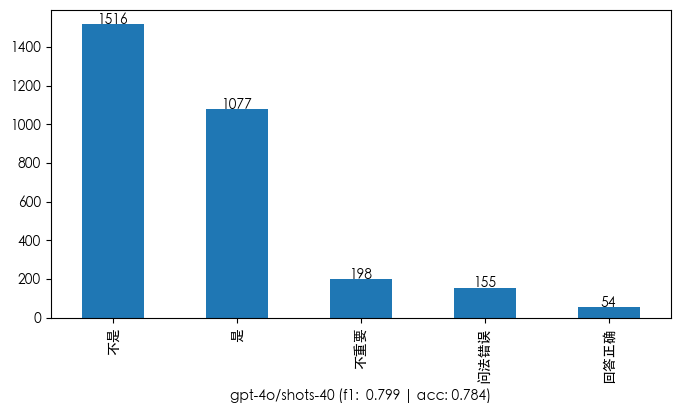

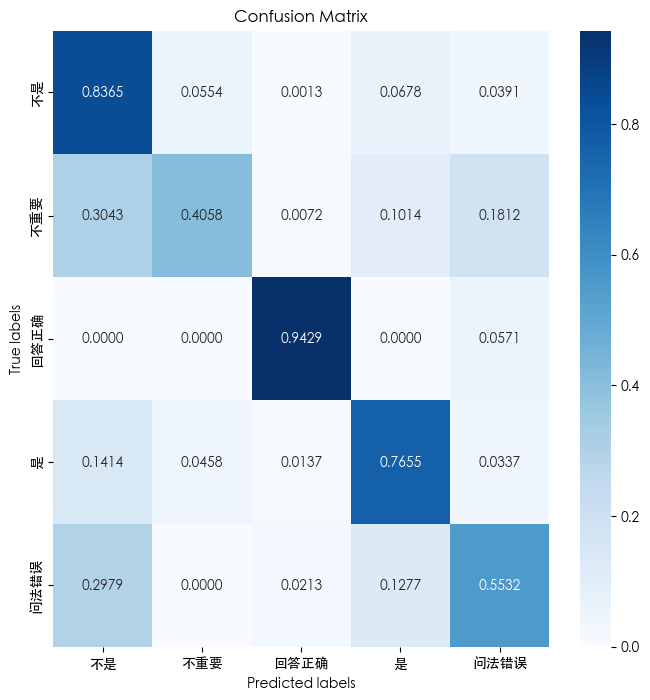

********** gpt-4o/shots-50 **********
gpt-4o/shots-50
不是       1523
是        1081
不重要       217
问法错误      126
回答正确       51
是\n\n       1
重要          1
Name: count, dtype: int64


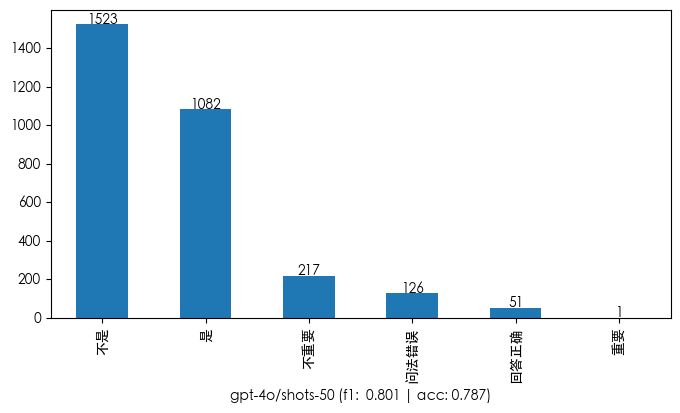

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:581: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


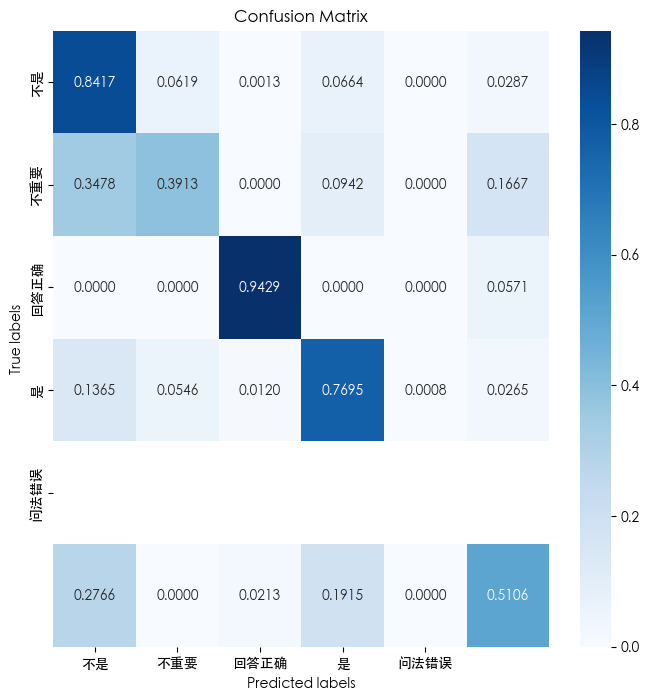

In [18]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})", preprocess_func=extract_answer)